<a href="https://colab.research.google.com/github/Mehak3360/DATA_GENERATION_USING_MODELLING_AND_SIMULATION/blob/main/Data_Generation_simpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install simpy

In [4]:
import simpy
import random
import pandas as pd

In [5]:
def hospital_sim(arrival_rate, service_time, num_servers):

    env = simpy.Environment()
    doctor = simpy.Resource(env, capacity=num_servers)

    waiting_times = []

    def patient(env):
        arrival = env.now

        with doctor.request() as request:
            yield request

            wait = env.now - arrival
            waiting_times.append(wait)

            yield env.timeout(service_time)

    def arrival_process(env):
        for i in range(20):   # 20 patients per simulation
            env.process(patient(env))
            yield env.timeout(arrival_rate)

    env.process(arrival_process(env))
    env.run()

    return sum(waiting_times)/len(waiting_times) if waiting_times else 0

In [6]:
results = []

for i in range(1000):

    arrival_rate = random.uniform(1,10)
    service_time = random.uniform(2,15)
    num_servers = random.randint(1,5)

    avg_wait = hospital_sim(arrival_rate, service_time, num_servers)

    results.append([arrival_rate, service_time, num_servers, avg_wait])

df = pd.DataFrame(results, columns=["arrival_rate","service_time","num_servers","avg_wait"])

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop("avg_wait", axis=1)
y = df["avg_wait"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR()
}

results_ml = []

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    r2 = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)

    results_ml.append([name, r2, mse])

ml_df = pd.DataFrame(results_ml, columns=["Model", "R2 Score", "MSE"])

print(ml_df)

               Model  R2 Score         MSE
0  Linear Regression  0.522315  350.129047
1                KNN  0.942218   42.352550
2      Decision Tree  0.978219   15.964860
3      Random Forest  0.992862    5.232289
4                SVR  0.332642  489.153357


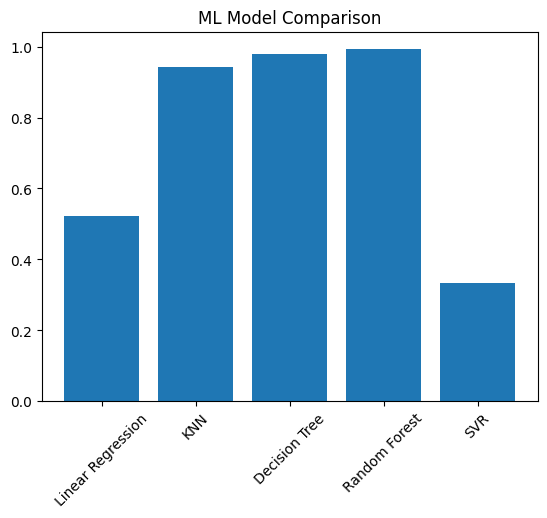

In [11]:
import matplotlib.pyplot as plt

plt.bar(ml_df["Model"], ml_df["R2 Score"])
plt.xticks(rotation=45)
plt.title("ML Model Comparison")
plt.show()